## Linear Regression - Bike Sharing Assignment

**Broadly, following are the steps performed in this assignment:**
1. Understanding the Data - EDA & Data Visualization
2. Data Preparation (for the Linear Regression model)
3. Model Building
4. Residual Analysis
5. Model Evaluation

In [1]:
# Ignore any runtime warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import all the required libraries & packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### 1. Understanding the Data - EDA & Data Visualization

In [3]:
#read the dataset
bbikes = pd.read_csv('day.csv')
bbikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bbikes.shape

(730, 16)

In [5]:
bbikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
bbikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


So, there are no null values in any of the columns. And there is only one non-numerical column in our dataset i.e. - `dteday`

In [7]:
bbikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Dropping the 'instant'(record index) column as it would be of no use to us
bbikes.drop('instant', axis=1, inplace=True)
bbikes.shape

(730, 15)

In [9]:
bbikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


For understanding the categorical variables well, we need to decode them by assigning them with their labels as per the data dictionary.

**Decoding & assigning the labels/values(as per data dictionary) to the Categorical Columns - season, mnth, weekday, weathersit**

*Since for yr, holiday & workingday, there are only two possible values in their respective columns, we will not be assigning labels to them as they can be interpreted easily even without labels*

In [10]:
#Starting with decoding the 'season' column
#season : season (1:spring, 2:summer, 3:fall, 4:winter)
bbikes.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [11]:
def decodeSeason(s):
    return s.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [12]:
bbikes[['season']] = bbikes[['season']].apply(decodeSeason)

In [13]:
bbikes['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [14]:
#Now decoding the 'mnth' column
bbikes.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [15]:
def decodeMnth(m):
    return m.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [16]:
bbikes[['mnth']] = bbikes[['mnth']].apply(decodeMnth)
bbikes['mnth'].value_counts()

Oct    62
May    62
Jul    62
Aug    62
Jan    62
Dec    62
Mar    62
Nov    60
Sep    60
Apr    60
Jun    60
Feb    56
Name: mnth, dtype: int64

In [17]:
#Now decoding the 'weekday' column
bbikes.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [18]:
def decodeWeekday(w):
    return w.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [19]:
bbikes[['weekday']] = bbikes[['weekday']].apply(decodeWeekday)
bbikes['weekday'].value_counts()

Tue    105
Mon    105
Fri    104
Thu    104
Wed    104
Sat    104
Sun    104
Name: weekday, dtype: int64

In [20]:
#Now decoding the 'weathersit' column
#1:Clear; 2:Mist; 3:LightSnow
bbikes.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [21]:
def decodeWeathersit(t):
    return t.map({1:'Clear',2:'Mist',3:'LightSnow'})

In [22]:
bbikes[['weathersit']] = bbikes[['weathersit']].apply(decodeWeathersit)
bbikes['weathersit'].value_counts()

Clear        463
Mist         246
LightSnow     21
Name: weathersit, dtype: int64

#### Data Visualization

In [23]:
bbikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Visualizing Numerical Variables**

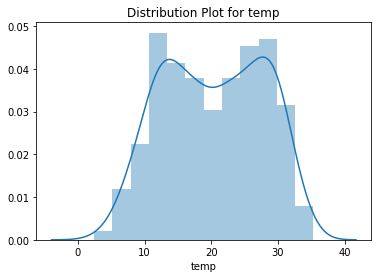

-------------------------------------------------


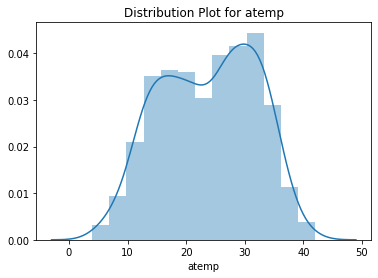

-------------------------------------------------


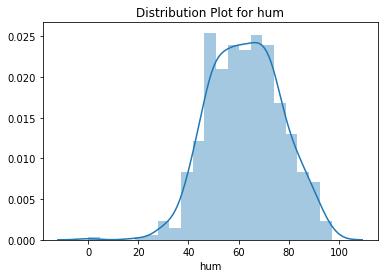

-------------------------------------------------


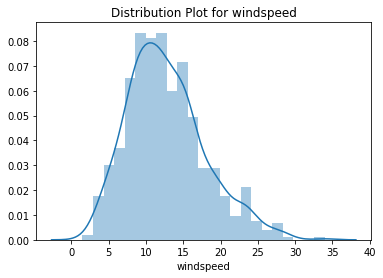

-------------------------------------------------


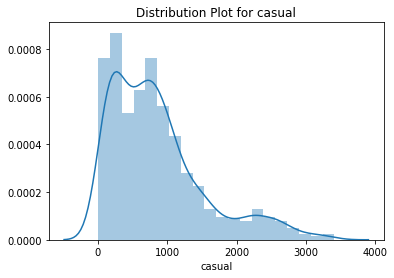

-------------------------------------------------


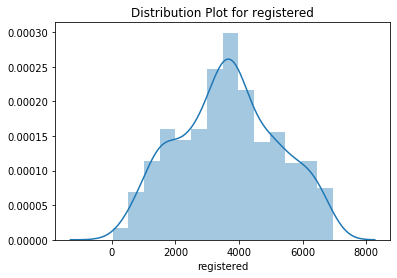

-------------------------------------------------


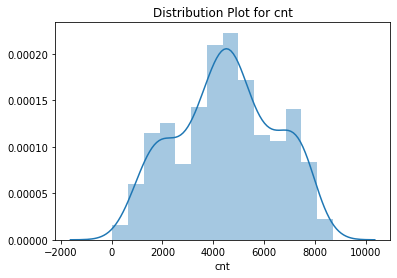

-------------------------------------------------


In [24]:
#[Univariate Analysis] Plotting distplot of numeric variables ->  temp, atemp, hum, windspeed, casual, registered, cnt
vars = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

for i in vars:
    sns.distplot(bbikes[i])
    plt.title("Distribution Plot for "+i)
    plt.show()
    print("-------------------------------------------------")

**Insight:** *Except for temp & atemp(which are bimodal), we see pretty much a normal distribution of all other numeric variables which is good for us.*

In [25]:
#typecasting 'dteday' into the daytime format.
bbikes['dteday'] = bbikes['dteday'].astype('datetime64')

In [26]:
bbikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
dteday        730 non-null datetime64[ns]
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 85.7+ KB


In [27]:
#[Bivariate Analysis] Plotting Pairplot of numeric variables ->  temp, atemp, hum, windspeed, casual, registered, cnt
numeric_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']
bbikes[numeric_vars].head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801
2,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,9.305237,11.46350,43.6957,12.522300,82,1518,1600


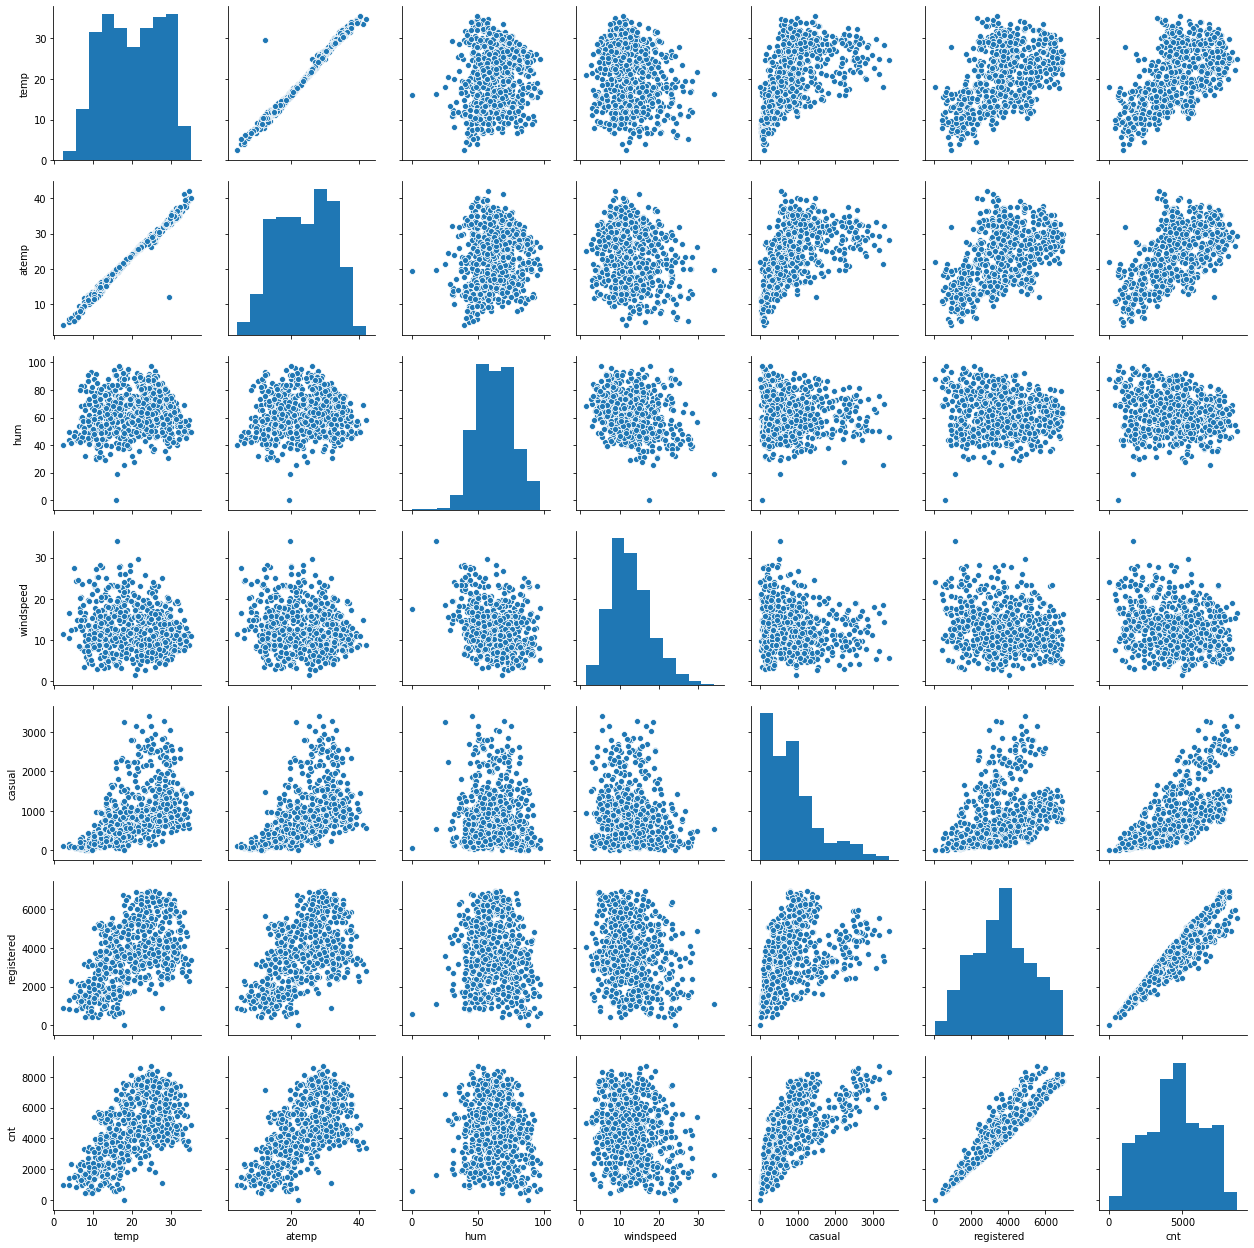

In [28]:
#Building pairplots of the selected numeric variables -> 'numeric_vars'
sns.pairplot(bbikes[numeric_vars])
plt.show()

In [29]:
#Building a Correlation Matrix for the selected numeric variables
bbcorr = bbikes[numeric_vars].corr()
bbcorr

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


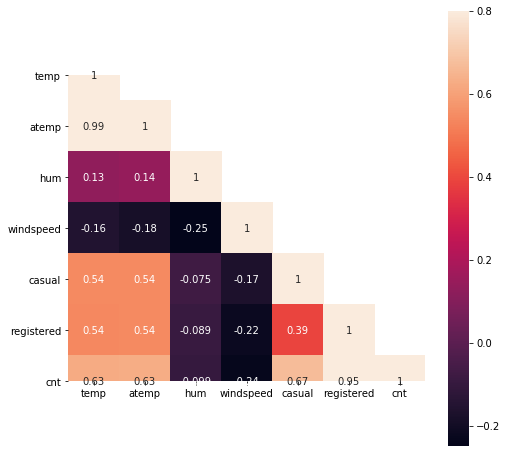

In [30]:
#Heatmap of the above Correlation Matrix
mask = np.array(bbcorr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(8,8)
sns.heatmap(bbcorr,annot=True, mask=mask, vmax=0.8, square=True);

**Insights:** <br>
From this Bivariate Analysis of numeric variables through pairplot & correlation matrix we can draw the below insights: 
1. There is strong linear relationship between `temp` & `atemp`. This is expected because(as per the data dictionary) atemp is the feeling temperature(`temp`) and therefore both the records (`temp` & `atemp`) would go hand-in-hand.
2. `temp` & `atemp` also have a decent correlation with the target cariable `cnt`.
3. There is a high correlation between `registered` & `cnt` and also between `casual` & `cnt`. This is very much expected because both `registered` & `casual` are a subset of our target variable `cnt`. i.e. `cnt` = `registered` + `casual`
4. From the Correlation Matrix, we can see that there is a negative correlation between `cnt` & `windspeed` which means that as the wind speed increases, the demand for bike rental goes down.

- Due to high correlation between `temp` & `atemp`, we would be chosing either `temp` or `atemp` as one of our predector variables for MLR model building. This would help in minimizing the effect of Multicollinearity to our model.
- Since the target variable `cnt` is a sum of both `register` & `casual`, there is no relevance of considering any of `register` or `casual` as our predictor variable in the MLR model building.

**Visualizing Categorical Variables**

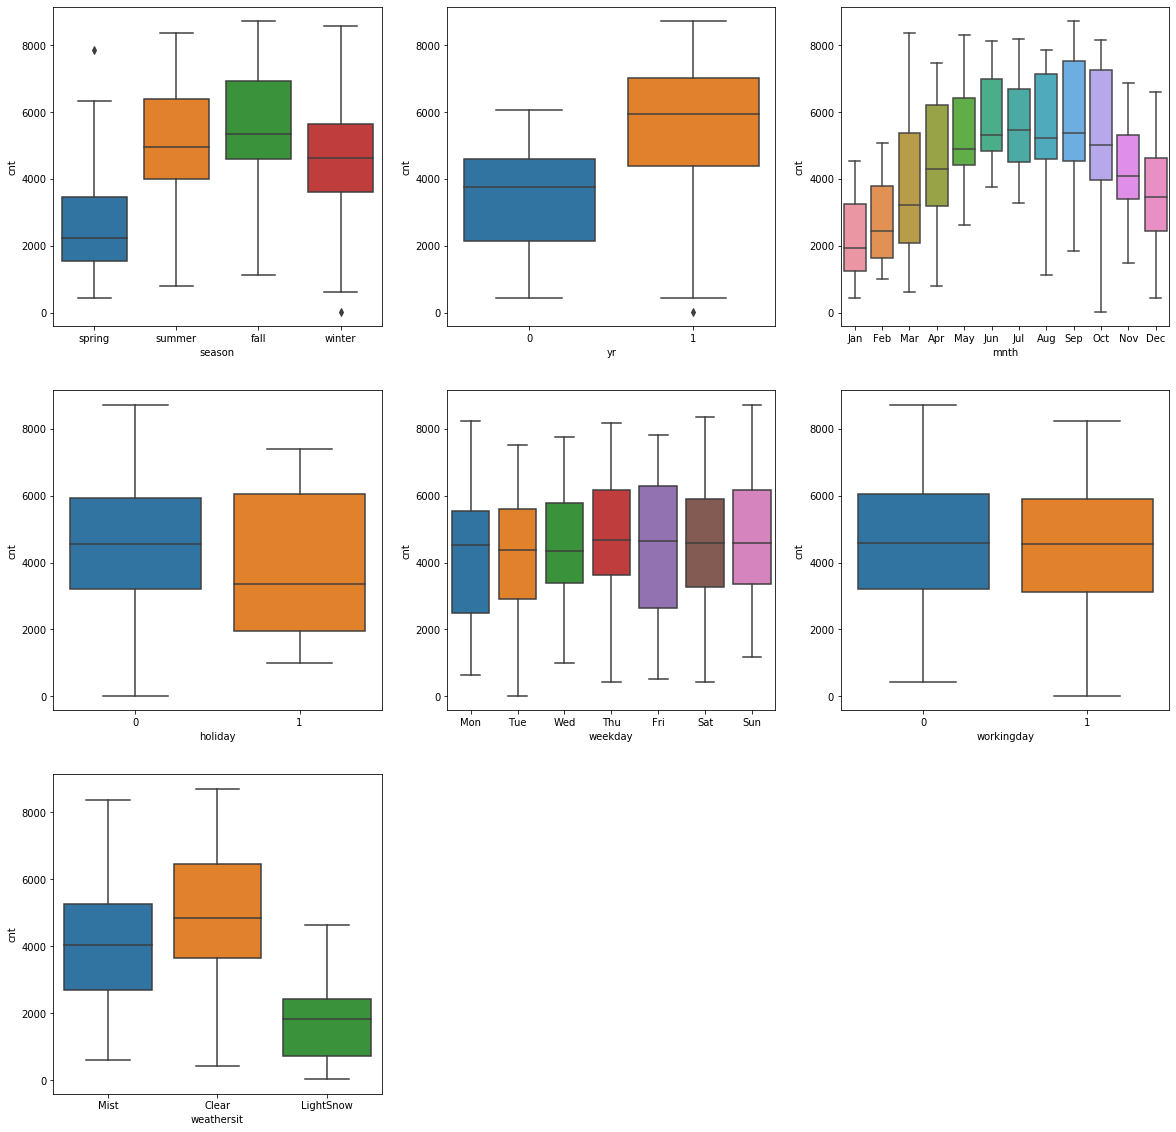

In [31]:
# Here we have a total of 7 categorical variables -> season, yr, mnth, holiday, weekday, workingday, weathersit
# Building subplot of all the 7 categorical variables
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bbikes)
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bbikes)
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bbikes)
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bbikes)
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bbikes)
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bbikes)
plt.subplot(337)
sns.boxplot(x='weathersit', y='cnt', data=bbikes)
plt.show()

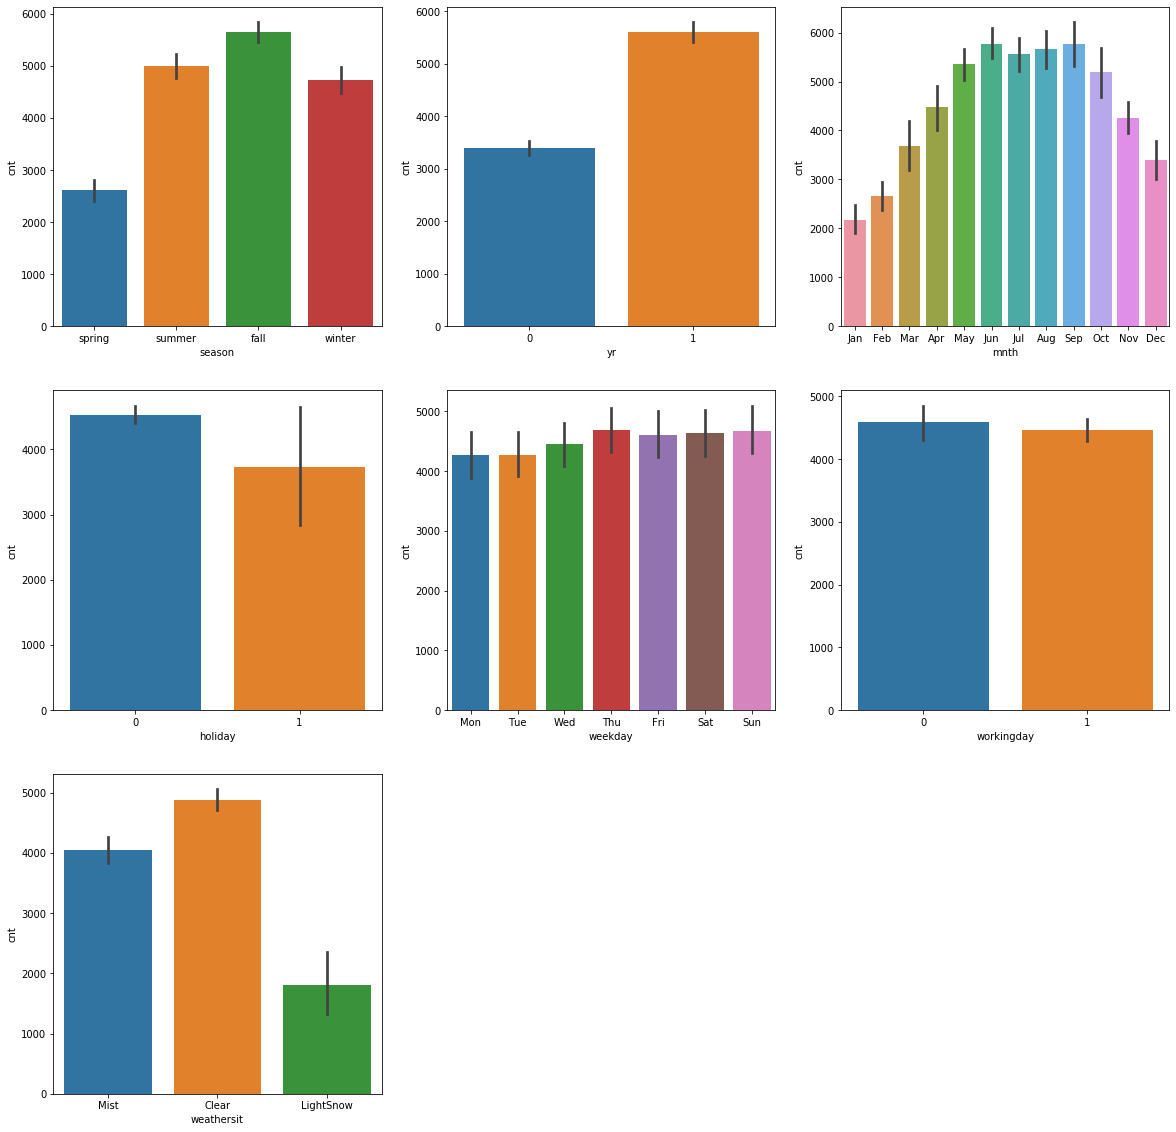

In [32]:
# Here we have a total of 7 categorical variables -> season, yr, mnth, holiday, weekday, workingday, weathersit
# Building subplot of all the 7 categorical variables
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.barplot(x='season', y='cnt', data=bbikes)
plt.subplot(3,3,2)
sns.barplot(x='yr', y='cnt', data=bbikes)
plt.subplot(3,3,3)
sns.barplot(x='mnth', y='cnt', data=bbikes)
plt.subplot(3,3,4)
sns.barplot(x='holiday', y='cnt', data=bbikes)
plt.subplot(3,3,5)
sns.barplot(x='weekday', y='cnt', data=bbikes)
plt.subplot(3,3,6)
sns.barplot(x='workingday', y='cnt', data=bbikes)
plt.subplot(337)
sns.barplot(x='weathersit', y='cnt', data=bbikes)
plt.show()

**Insights:**    
1. From both the set of visualizations above, we can see that the demand for bike rentals is influenced by change in weather conditions, months, season & year.
2. The demand for bike rental steadily increases by the mid of the year (that is during Summer & Fall season) and attains its peak. This peak in the demand gradually goes down towards the end of the year, that is in the winter season. 
3. People tend to rent a bike mostly when the weather is Clear or Partly Cloudy. (this insight is even supported by the aforementioned point)


### 2. Data Preparation

In order to prepare the dataset for MLR modelling, we need to first encode all the categorical variables into numeric variables using one-hot encoding.

In [33]:
bbikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
dteday        730 non-null datetime64[ns]
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 85.7+ KB


Please note that there would be no use of `dteday` column in the model building process because we already have quite a few other usefull variables such as - yr, mnth, weekday, workingday

In [34]:
#Encoding the categocial variables -> season, mnth, weekday, weathersit
cat_vars = ['season','mnth','weekday','weathersit']
bb_dummies = pd.get_dummies(bbikes[cat_vars], drop_first=True)
bb_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
0,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
bb_dummies.shape

(730, 22)

In [36]:
bb_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
season_spring           730 non-null uint8
season_summer           730 non-null uint8
season_winter           730 non-null uint8
mnth_Aug                730 non-null uint8
mnth_Dec                730 non-null uint8
mnth_Feb                730 non-null uint8
mnth_Jan                730 non-null uint8
mnth_Jul                730 non-null uint8
mnth_Jun                730 non-null uint8
mnth_Mar                730 non-null uint8
mnth_May                730 non-null uint8
mnth_Nov                730 non-null uint8
mnth_Oct                730 non-null uint8
mnth_Sep                730 non-null uint8
weekday_Mon             730 non-null uint8
weekday_Sat             730 non-null uint8
weekday_Sun             730 non-null uint8
weekday_Thu             730 non-null uint8
weekday_Tue             730 non-null uint8
weekday_Wed             730 non-null uint8
weathersit_LightSnow    730 non-nul

In [37]:
# Dropping the categorical variables from 'bbikes' & concatinatiing the 'bb_dummies' dataset with 'bbikes'
bbikes.drop(cat_vars, axis=1, inplace=True)
bbikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
dteday        730 non-null datetime64[ns]
yr            730 non-null int64
holiday       730 non-null int64
workingday    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 62.9 KB


In [38]:
bbikes.shape

(730, 11)

In [39]:
# Concatinatiing the 'bb_dummies' dataset with 'bbikes'
bbikes = pd.concat([bbikes,bb_dummies], axis=1)
bbikes.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
0,2018-01-01,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,1
1,2018-02-01,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,0,0,0,0,1,0,0,1
2,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,0,0,0,0,0,1,0,0
3,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,0,0,0,1,0,0,0,0
4,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,0,0,0,0,0,0,0,0


In [40]:
bbikes.shape

(730, 33)

In [41]:
bbikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
dteday                  730 non-null datetime64[ns]
yr                      730 non-null int64
holiday                 730 non-null int64
workingday              730 non-null int64
temp                    730 non-null float64
atemp                   730 non-null float64
hum                     730 non-null float64
windspeed               730 non-null float64
casual                  730 non-null int64
registered              730 non-null int64
cnt                     730 non-null int64
season_spring           730 non-null uint8
season_summer           730 non-null uint8
season_winter           730 non-null uint8
mnth_Aug                730 non-null uint8
mnth_Dec                730 non-null uint8
mnth_Feb                730 non-null uint8
mnth_Jan                730 non-null uint8
mnth_Jul                730 non-null uint8
mnth_Jun                730 non-null uint8
mnth_Mar          

Now dropping the columns which are not relevant for the MLR model building:
- Since the target variable `cnt` is a sum of both `registered` & `casual`, there is no relevance of considering any of `registered` or `casual` as our predictor variable in the MLR model building.
- There would be no use of `dteday` column in the model building process because we already have quite a few other usefull variables such as - yr, mnth, weekday, workingday

In [42]:
bbikes.drop(['registered','casual','dteday'], axis=1, inplace=True)
bbikes.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

In [43]:
len(bbikes.columns)

30

Looking at the dataset, there isn't seem to be a need to derive any additional variables/features for building the MLR model.

### 3. Model Building

In [44]:
# Getting the dependent(y) & independent(X) variables
y = bbikes.pop('cnt')
X = bbikes

In [45]:
y.shape

(730,)

In [46]:
X.shape

(730, 29)

**Train Test Split**

In [47]:
# train-test-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
X_train.shape

(584, 29)

In [49]:
X_test.shape

(146, 29)

In [50]:
y_train.shape

(584,)

In [51]:
y_test.shape

(146,)

In [52]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

### Scaling
*Performing the Standard Scaling*

In [53]:
#Importing the required sklearn package & creating an object of Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [54]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584 entries, 239 to 684
Data columns (total 29 columns):
yr                      584 non-null int64
holiday                 584 non-null int64
workingday              584 non-null int64
temp                    584 non-null float64
atemp                   584 non-null float64
hum                     584 non-null float64
windspeed               584 non-null float64
season_spring           584 non-null uint8
season_summer           584 non-null uint8
season_winter           584 non-null uint8
mnth_Aug                584 non-null uint8
mnth_Dec                584 non-null uint8
mnth_Feb                584 non-null uint8
mnth_Jan                584 non-null uint8
mnth_Jul                584 non-null uint8
mnth_Jun                584 non-null uint8
mnth_Mar                584 non-null uint8
mnth_May                584 non-null uint8
mnth_Nov                584 non-null uint8
mnth_Oct                584 non-null uint8
mnth_Sep                5

In [55]:
# Before Scaling
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
239,0,0,1,28.989419,32.39795,56.1765,20.412153,0,0,0,...,0,0,0,0,0,0,1,0,0,0
97,0,0,0,13.769153,16.22395,83.6250,15.208464,0,1,0,...,0,0,0,0,1,0,0,0,0,1
503,1,0,0,24.600000,28.34540,45.6250,5.626325,0,1,0,...,0,0,0,0,1,0,0,0,0,0
642,1,0,0,25.215000,29.00935,62.7500,7.125450,0,0,1,...,1,0,0,1,0,0,0,0,0,0
498,1,0,1,23.506653,27.49500,78.9583,14.250364,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [56]:
#Scaling the train & test datasets. 
#Please note that here we are scaling only the independent variables of both the datasets.

num_vars = ['temp','atemp','hum','windspeed']   # Selecting the numeric variables
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars]) 

In [57]:
# After Scaling
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_LightSnow,weathersit_Mist
239,0,0,1,1.169798,1.079889,-0.460004,1.494191,0,0,0,...,0,0,0,0,0,0,1,0,0,0
97,0,0,0,-0.849259,-0.896778,1.498668,0.480773,0,1,0,...,0,0,0,0,1,0,0,0,0,1
503,1,0,0,0.587516,0.584616,-1.212939,-1.385350,0,1,0,...,0,0,0,0,1,0,0,0,0,0
642,1,0,0,0.669099,0.665759,0.009068,-1.093395,0,0,1,...,1,0,0,1,0,0,0,0,0,0
498,1,0,1,0.442477,0.480687,1.165661,0.294182,0,1,0,...,0,0,0,0,0,0,1,0,0,1


Now, the train data is completely prepared to feed into the MLR model. Let's start with building the model...

**Building the 1st model now...**

In [58]:
#Using statsmodel
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train) #Adding a constant
lm = sm.OLS(y_train,X_train_lm).fit() # fitting the model
print(lm.summary()) # model summary

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     98.59
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          9.89e-198
Time:                        21:53:43   Log-Likelihood:                -4703.5
No. Observations:                 584   AIC:                             9467.
Df Residuals:                     554   BIC:                             9598.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4551.8419 

In [59]:
# Predicting from the test dataset
X_test_lm = sm.add_constant(X_test)
y_pred = lm.predict(X_test_lm)

In [60]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8705113795829628

From the model summary, there are quite a few insignificant predictor variables & it seems that there is a scope to further improve our model.      
Let's perform the Feature Selection through RFE method

**Feature Selection using RFE**

In [61]:
# Applying RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
#Building the model & applying RFE to get the top 20 features
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

In [63]:
#Feature Ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 9),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 4),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 5),
 ('mnth_Mar', False, 7),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 8),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 2),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 10),
 ('weekday_Tue', False, 3),
 ('weekday_Wed', False, 6),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', True, 1)]

In [64]:
#No. of Features left after RFE
(rfe.support_==True).sum()

20

In [65]:
#Features left after RFE
cols = X_train.columns[rfe.support_]
cols

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Jul', 'mnth_May', 'mnth_Nov', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

In [66]:
#Creating the new train & test daataset after RFE
X_train_rfe = X_train[cols]
X_test_rfe = X_test[cols]

In [67]:
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_LightSnow,weathersit_Mist
239,0,0,1,1.169798,1.079889,-0.460004,1.494191,0,0,0,0,0,0,0,0,0,0,0,0,0
97,0,0,0,-0.849259,-0.896778,1.498668,0.480773,0,0,0,0,0,0,0,0,0,0,1,0,1
503,1,0,0,0.587516,0.584616,-1.212939,-1.385350,0,0,0,0,0,0,1,0,0,0,1,0,0
642,1,0,0,0.669099,0.665759,0.009068,-1.093395,0,1,0,0,0,0,0,0,0,1,0,0,0
498,1,0,1,0.442477,0.480687,1.165661,0.294182,0,0,0,0,0,0,1,0,0,0,0,0,1


In [68]:
X_test_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_winter,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,weekday_Sat,weekday_Sun,weathersit_LightSnow,weathersit_Mist
196,0,0,1,1.058888,1.020640,-0.294204,0.237423,0,0,0,0,0,1,0,0,0,0,0,0,0
187,0,0,0,1.403349,1.317666,0.178544,-0.403795,0,0,0,0,0,1,0,0,0,1,0,0,0
14,0,0,1,-1.406745,-1.363429,-0.909667,-0.419936,1,0,0,0,1,0,0,0,0,0,0,0,1
31,0,0,1,-1.630605,-1.446424,1.450965,-1.786740,1,0,0,1,0,0,0,0,0,0,0,0,1
390,1,0,0,-0.817529,-0.703860,1.022945,-1.523390,1,0,0,0,1,0,0,0,0,1,0,0,1


In [69]:
#Using statsmodel
#Importig the required packages and defining cusotm functions for model building & computing the VIF of the predictors
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X,lm
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

**Building the 2nd model now...**

In [70]:
X_train_lm2, lm2 = build_model(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     142.7
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.64e-205
Time:                        21:53:43   Log-Likelihood:                -4707.9
No. Observations:                 584   AIC:                             9458.
Df Residuals:                     563   BIC:                             9550.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4451.8607 

In [71]:
# Predicting from the test dataset
X_test_lm = sm.add_constant(X_test_rfe)
y_pred = lm2.predict(X_test_lm)

In [72]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8679845511057207

In [73]:
#Check for VIF to understand the Multicollinearity of the model
checkVIF(X_train_lm2)

,Features,VIF
0,const,263.77
4,temp,59.30
5,atemp,58.59
3,workingday,53.78
17,weekday_Sat,30.92
18,weekday_Sun,30.33
2,holiday,5.48
8,season_spring,3.87
9,season_winter,2.50
12,mnth_Jan,2.20


From the Model Summary, look for all the features whose p-value is greater than 0.05 and drop these features one by one.     
- From the above model, we see that `weekday_Sat`, `weekday_Sun`, `workingday` & `atemp` has high p-values
- From the VIF table, we can also see that these variables along with `temp` has very high VIF values as well.

Lets re-build the model by removing these variables one by one...

Rebuilding the model without `weekday_Sat`

In [74]:
#Dropping 'weekday_Sat' column
X_train_rfe1 = X_train_rfe.drop(["weekday_Sat"], axis = 1)
X_test_rfe1 = X_test_rfe.drop(["weekday_Sat"], axis = 1)

**Building the 3rd model now...**

In [75]:
X_train_lm3, lm3 = build_model(X_train_rfe1, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     150.2
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.92e-206
Time:                        21:53:43   Log-Likelihood:                -4708.3
No. Observations:                 584   AIC:                             9457.
Df Residuals:                     564   BIC:                             9544.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4042.5158 

In [76]:
# Predicting from the test dataset
X_test_lm = sm.add_constant(X_test_rfe1)
y_pred = lm3.predict(X_test_lm)

In [77]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8687180007204338

In [78]:
checkVIF(X_train_lm3)

,Features,VIF
4,temp,59.29
5,atemp,58.59
0,const,13.28
8,season_spring,3.86
9,season_winter,2.50
12,mnth_Jan,2.20
6,hum,2.19
11,mnth_Feb,1.92
3,workingday,1.83
15,mnth_Nov,1.76


We still can see very high p-value of `weekday_Sun`

Rebuilding the model without `weekday_Sun`

In [79]:
#Dropping the 'weekday_Sun' column
X_train_rfe2 = X_train_rfe1.drop(["weekday_Sun"], axis = 1)
X_test_rfe2 = X_test_rfe1.drop(["weekday_Sun"], axis = 1)

**Building the 4th model now...**

In [80]:
X_train_lm4, lm4 = build_model(X_train_rfe2, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     158.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          2.50e-207
Time:                        21:53:43   Log-Likelihood:                -4708.4
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     565   BIC:                             9538.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4068.7595 

In [81]:
# Predicting from the test dataset
X_test_lm = sm.add_constant(X_test_rfe2)
y_pred = lm4.predict(X_test_lm)

In [82]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.868675263661999

In [83]:
checkVIF(X_train_lm4)

,Features,VIF
4,temp,59.14
5,atemp,58.49
0,const,9.68
8,season_spring,3.86
9,season_winter,2.50
12,mnth_Jan,2.20
6,hum,2.19
11,mnth_Feb,1.92
15,mnth_Nov,1.76
18,weathersit_Mist,1.69


Rebuilding the model without `atemp`

In [84]:
#Dropping the 'atemp' column
X_train_rfe3 = X_train_rfe2.drop(["atemp"], axis = 1)
X_test_rfe3 = X_test_rfe2.drop(["atemp"], axis = 1)

**Building the 5th model now...**

In [85]:
X_train_lm5, lm5 = build_model(X_train_rfe3, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     167.8
Date:                Mon, 25 Jan 2021   Prob (F-statistic):          4.43e-208
Time:                        21:53:44   Log-Likelihood:                -4709.3
No. Observations:                 584   AIC:                             9455.
Df Residuals:                     566   BIC:                             9533.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4065.4452 

In [86]:
# Predicting from the test dataset
X_test_lm = sm.add_constant(X_test_rfe3)
y_pred = lm5.predict(X_test_lm)

In [87]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8688394564416283

In [88]:
checkVIF(X_train_lm5)

,Features,VIF
0,const,9.67
7,season_spring,3.86
4,temp,3.71
8,season_winter,2.49
11,mnth_Jan,2.19
5,hum,2.17
10,mnth_Feb,1.92
14,mnth_Nov,1.76
17,weathersit_Mist,1.68
9,mnth_Dec,1.60


### Looking at the key summary statistics from the 5th Model:

##### 1. Feature Coefficients & VIF: 
- From the model summary, we can see that the feature coefficients have very low p-values(i.e. within the permissible limit of 0.05). Threfore, all the coefficients are statistically significant.
- The VIFs of all the feature variables are lying within the permissible range(i.e. below 5). Therefore, there is no multicollinearity in this model. 

##### 2. F-statistic:
- Through multiple iterations of refining our model, we have attained the lowest value of Prob(F-statistic). This shows that the model fit is statistically significant, and the explained variance isn't purely by chance.

##### 3. R-Squared & Adj. R-Squared: 
- Through multiple iterations of building a stable & statistically significant model, we have attained the best possible values of R-Squared(0.834) & Adj. R-Squared(0.829). This is a decent R-squared/Adj.R-squared value.

### Therefore, we can now conclude this as our FINAL MLR Model.

### 4. Residual Analysis

As part of this Residual Analysis, we check if the error terms are normally distributed (which is infact, one of the major assumptions of linear regression), let's plot the histogram of the error terms and see what it looks like.

In [89]:
y_train_pred = lm5.predict(X_train_lm5)

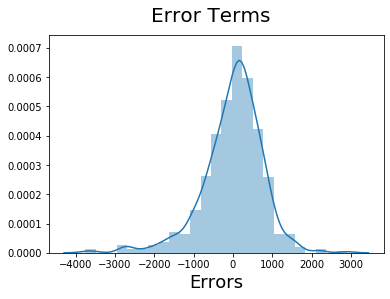

In [90]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 25)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

Here, **Error terms of the model are normally distributed with mean equals to zero**. Therefore, our model satisfies the most important assumptions of Linear Regression. 

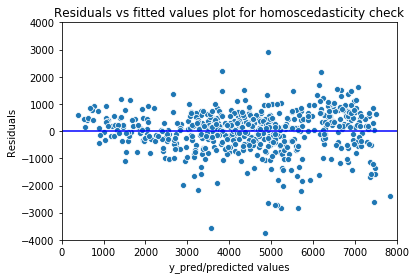

In [91]:
#Plotting Error Terms with respect to the Predicted values
residuals = (y_train - y_train_pred)
sns.scatterplot(y_train_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-4000,4000)
plt.xlim(0,8000)
sns.lineplot([0,8000],[0,0],color='blue')
plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

From the above plot of Error Terms against the predicted values, we can clearly see that the Error Terms are independently distributed & there is not identifiable pattern within them. This verifies the assumption of Homoscedasticity.

### 5. Model Evaluation

In [92]:
# Predicting from the test dataset
X_test_lm = sm.add_constant(X_test_rfe3)
y_pred = lm5.predict(X_test_lm)

In [93]:
#Calculating R-Squared of the model with repect to the test dataset
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8688394564416283

Let's now plot the graph for actual versus predicted values.

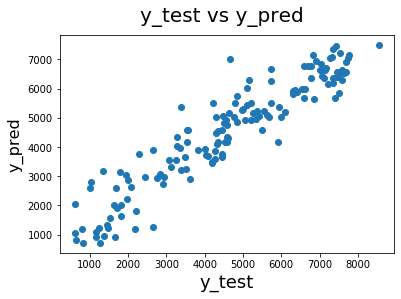

In [94]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

From the above plot, we can see a good linear relationship between the actual & the predicted values of the test data

## Thank You!
                                                                       Assignment Submitted by: Abhinav Choudhary [DS C24]